# Science goals and motivation

#### Does having a close nearby stellar companion affect the flaring behavior of low-mass stars?

In [1]:
import idflares as idf
import flareplots as fp

%matplotlib nbagg

longcadencefile = '02_koi256_Q03_LC.hdf5'
shortcadencefile = '05_koi256_Q06_SC.hdf5'

/usr/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


# What does the data look like?

#### Light curves: Brightness of the star as a function of time.

Three components of the light curve:

1) Sinusoidal(-ish) periodic signal: Represents the rotation period of the star

2) Short dips occuring at regular frequency: This is where one of the stars is passing behind the either and causees a decrease in the brightness of the system (you're only measuring light from one of the stars now, rather than both of them)

3) Short, irregular bursts of brightening: These are the flares. Our goal is to a) identify these flares, and b) create a "smoothed" version of the light curve with no flares (flare-free reference light curve).

<IPython.core.display.Javascript object>


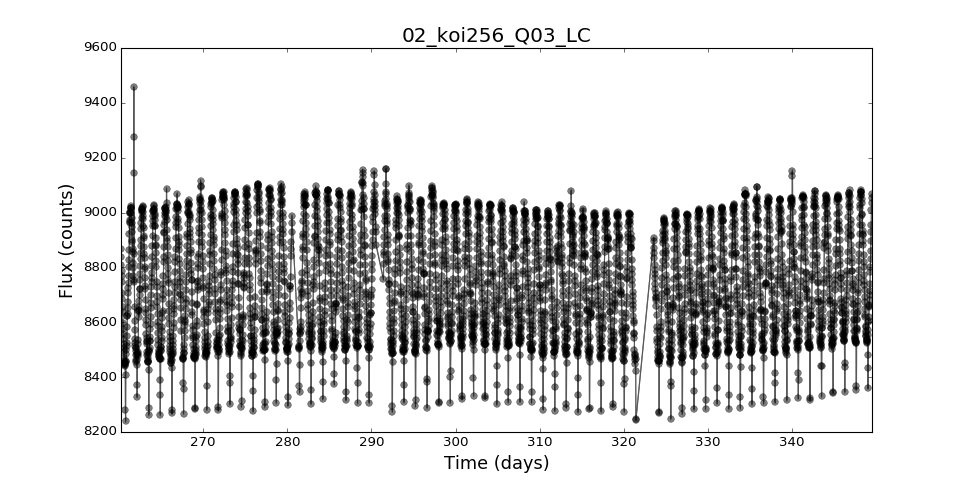

In [2]:
lc = idf.lightcurve(longcadencefile, _ubersmoother=False, _flarebyprobs=False, _flarebyeye=False)
idf.show_lightcurve(lc)

<IPython.core.display.Javascript object>


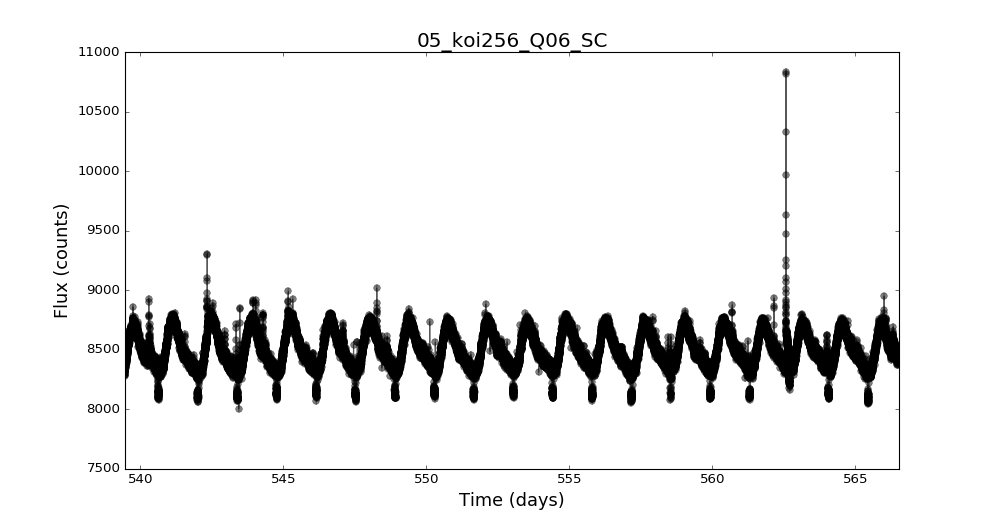

In [3]:
sc = idf.lightcurve(shortcadencefile, _ubersmoother=False, _flarebyprobs=False, _flarebyeye=False)
idf.show_lightcurve(sc)

#### Phased light curves: Fold the data according a measured frequency of periodicity (stellar rotation in this case)

<IPython.core.display.Javascript object>


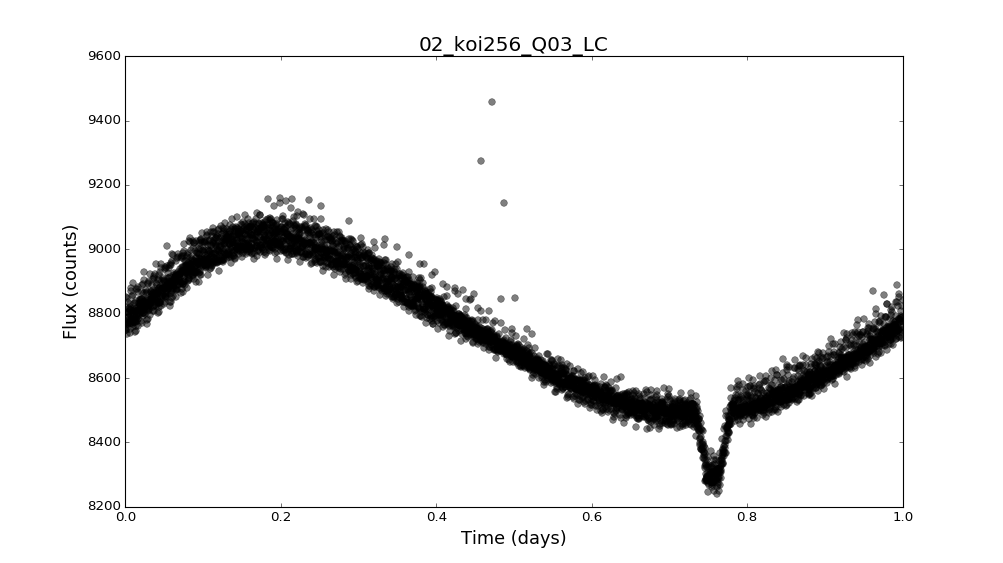

In [4]:
idf.show_lightcurve(lc, phased=True)

# Smoothing the light curve: i.e. flare-free reference light curve

<IPython.core.display.Javascript object>


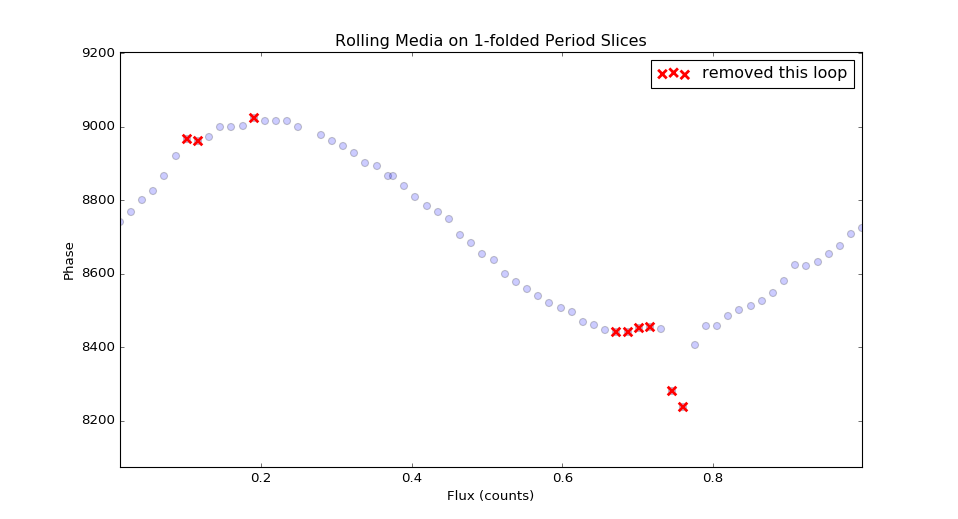

<IPython.core.display.Javascript object>


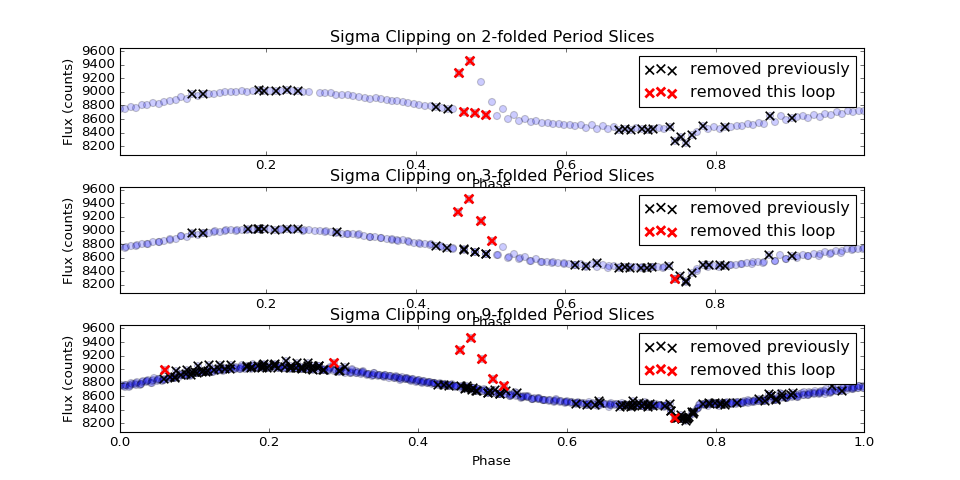

<IPython.core.display.Javascript object>


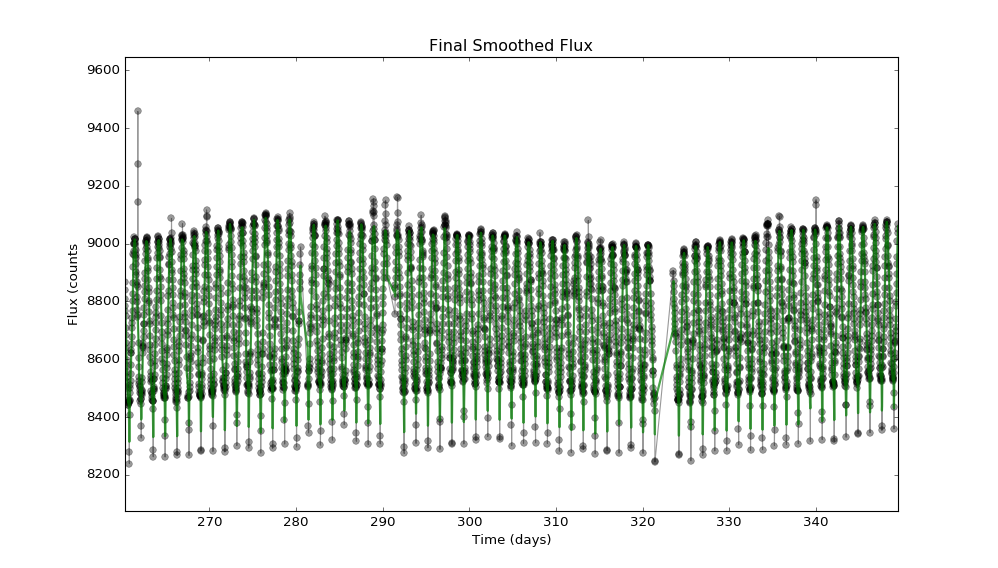

In [5]:
lc.ubersmoother(check=True)

# Flare candidates

First pass at validating flares by making sure flux increase is
                 greater than 3standard deviations about mean
              


<IPython.core.display.Javascript object>


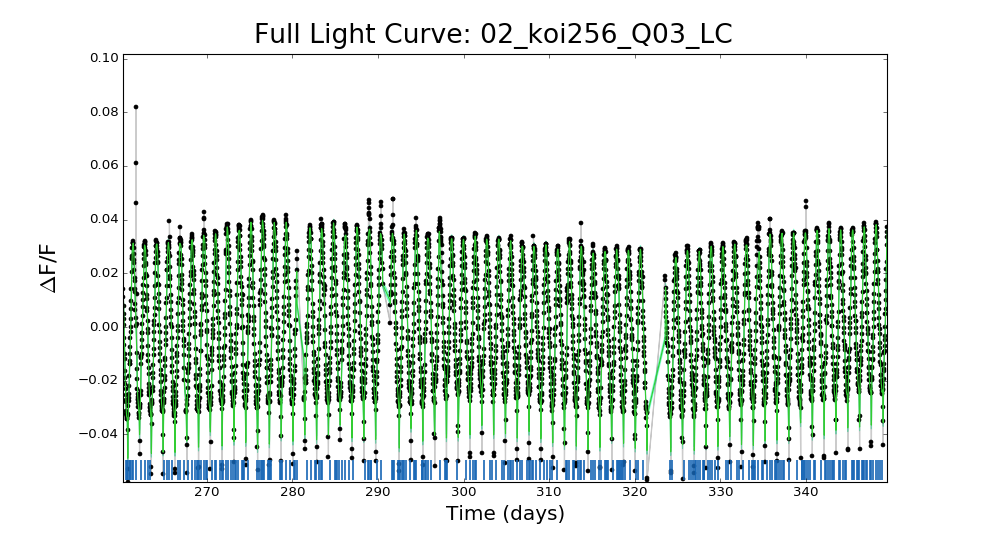

In [6]:
lc.flarebyprobs(check=True)

Second pass at flare validation. Here they are checked by eye
                 using an outside IDL software packaged, fbeye.pro
              


<IPython.core.display.Javascript object>


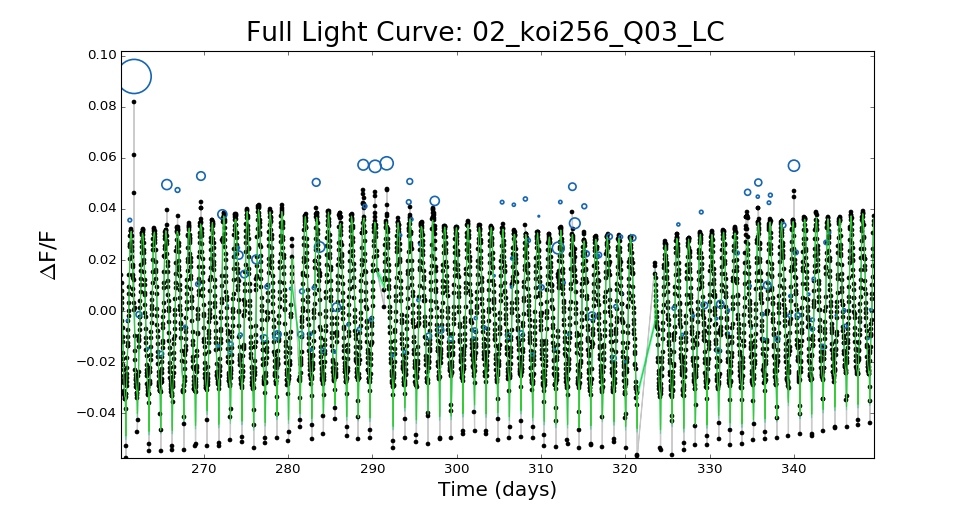

In [7]:
lc.flarebyeye(check=True)

<IPython.core.display.Javascript object>


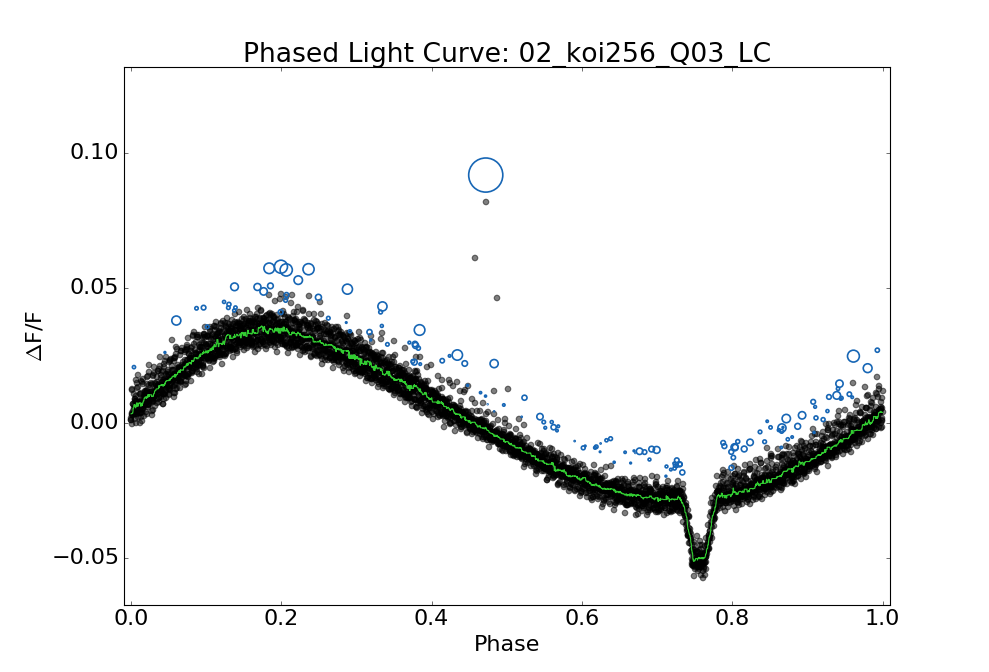

In [8]:
idf.plotphase(lc, save=False)

<IPython.core.display.Javascript object>


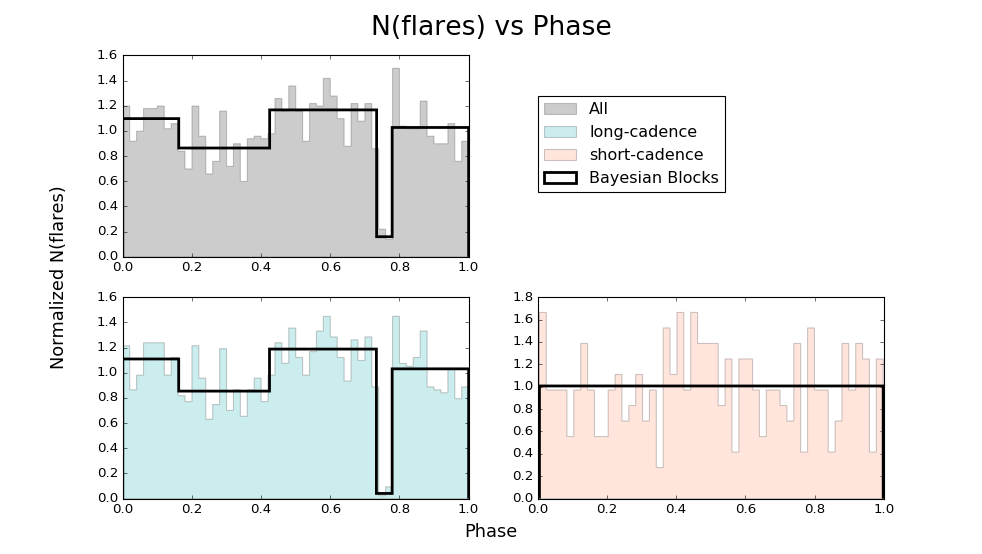

In [9]:
data = fp.flareplots()
fp.flare_phase_hist(data, save=False)